# Project 2- DSC 440 Data Science Practicum 

# Sara Davila 

# Edelweis Flower DataSet ( 13 GB)

* Website to extract the data : https://www.kaggle.com/datasets/ndomalau/edelweis-flower

## Exploring the Edelweiss Flower Dataset

The Edelweiss Flower dataset is designed for image classification, focusing on three species of Edelweiss flowers. The dataset includes 3,500 images for training data and 1,050 images for test data. The primary goal of this project is to perform image classification using neural networks, using machine learning techniques to automatically categorize images into different species.

### Dataset Details:

The dataset comprises images of Edelweiss flowers, and the key details include:

1. **Species:** The dataset covers three species of Edelweiss flowers.
    - Anaphalis_Javanica
    - Leontopodium_Alpinum
    - Leucogenes_Grandiceps
2. **Training Data:** 3,500 images for model training.
3. **Test Data:** 1,050 images for evaluating model performance.

### Machine Learning and Image Data Augmentation:

#### Image Data Augmentation:

In this project, image data augmentation is employed using the Python programming language and the Scikit-image library. Image data augmentation is a technique that involves reproducing the dataset by applying various transformations to the original images. Some augmentation methods include:

- **Rotation:** Rotating the image to capture variations in orientation.
- **Noise Addition:** Introducing noise to the image to simulate real-world variability.
- **Flipping:** Mirroring the image horizontally or vertically to diversify the dataset.

### Objectives of the Project:

1. **Dataset Preparation:**
   - Assemble a comprehensive dataset of Edelweiss flower images.
   - Implement image data augmentation techniques to enhance the dataset's diversity.

2. **Neural Network Model:**
   - Develop a neural network model for image classification.
   - Train the model using the augmented dataset.

3. **Evaluation and Testing:**
   - Evaluate the model's performance using the test dataset.
   - Assess the accuracy, precision, recall, and F1 score of the model.

4. **Fine-tuning and Optimization:**
   - Fine-tune the model based on evaluation results.
   - Optimize hyperparameters to enhance overall performance.





# Visualize the Data

### Importing Libraries:

The code begins by importing the necessary libraries, including `Image` from PIL for image handling, `matplotlib.pyplot` for plotting, and `os` for interacting with the operating system.

### Define Paths:

Two variables, `train_data_dir` and `test_data_dir`, store the paths to the training and test datasets.

### List Classes:

The code retrieves a sorted list of all classes in the training dataset. It assumes that the classes are the same in both the training and test datasets.

### Visualize Images:

The script iterates through each flower class, loads a few images from the training set for that class, and visualizes them using Matplotlib. A subplot is created for each image, displaying the class name as the title. The images are shown in a grid format.





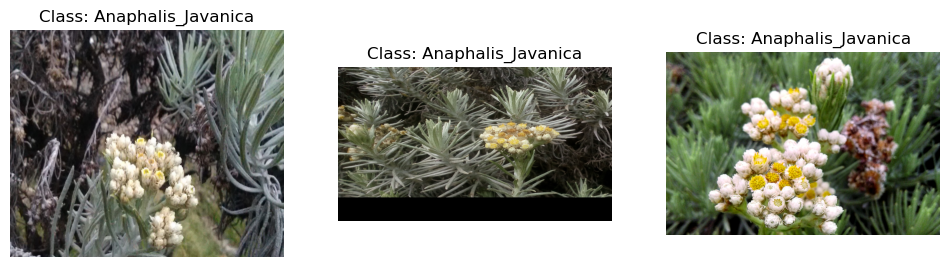

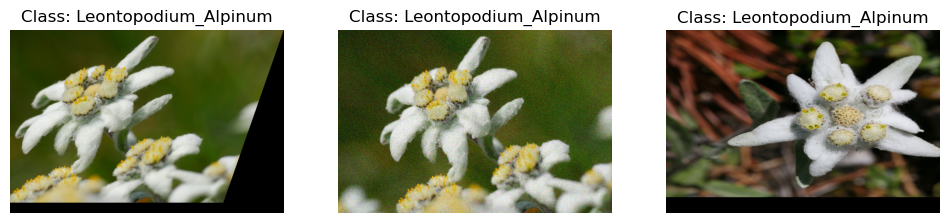

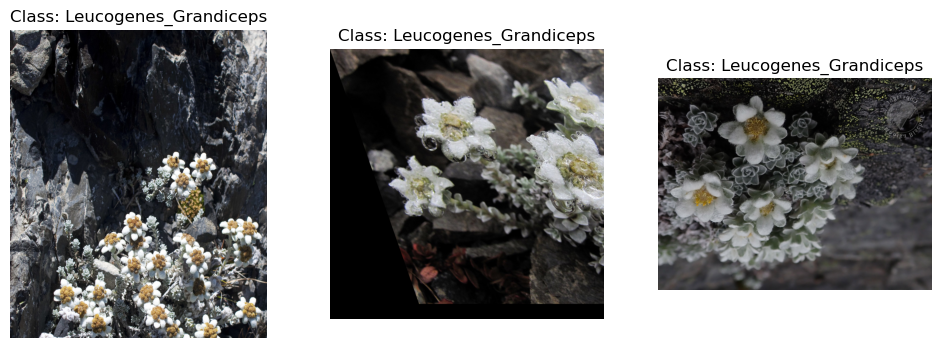

In [29]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Define paths
train_data_dir = '/Users/saradavila/Downloads/archive-3/Train'
test_data_dir = '/Users/saradavila/Downloads/archive-3/Test'

# List all classes in the dataset
classes = sorted(os.listdir(train_data_dir))  # Assuming classes are the same in both train and test

# Visualize a few images from each class
num_images_per_class = 3

for flower_class in classes:
    train_class_dir = os.path.join(train_data_dir, flower_class)
    train_image_files = os.listdir(train_class_dir)[:num_images_per_class]

    plt.figure(figsize=(12, 4))

    for i, image_file in enumerate(train_image_files, 1):  # Fix variable name here
        image_path = os.path.join(train_class_dir, image_file)
        image = Image.open(image_path)

        plt.subplot(1, num_images_per_class, i)
        plt.imshow(image)
        plt.title(f'Class: {flower_class}')
        plt.axis('off')

    plt.show()


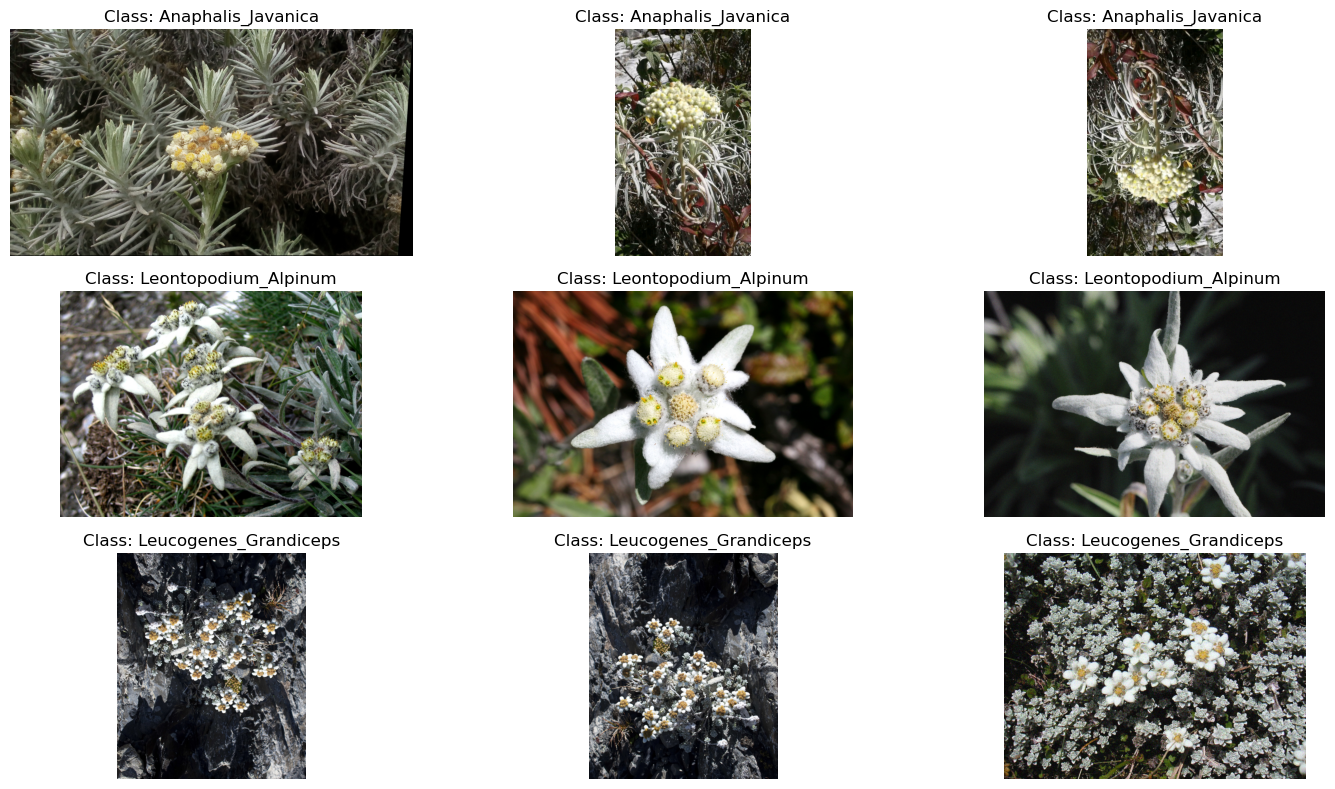

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

# Define paths
train_data_dir = '/Users/saradavila/Downloads/archive-3/Train'
test_data_dir = '/Users/saradavila/Downloads/archive-3/Test'

# List all classes in the dataset
classes = sorted(os.listdir(train_data_dir))  

# Set the number of images to display for each class
num_images_per_class = 3

# Visualize a few random images from each class
plt.figure(figsize=(15, 8))

for i, flower_class in enumerate(classes, 1):
    train_class_dir = os.path.join(train_data_dir, flower_class)
    train_image_files = random.sample(os.listdir(train_class_dir), num_images_per_class)

    for j, image_file in enumerate(train_image_files, 1):
        image_path = os.path.join(train_class_dir, image_file)
        image = Image.open(image_path)

        plt.subplot(len(classes), num_images_per_class, (i - 1) * num_images_per_class + j)
        plt.imshow(image)
        plt.title(f'Class: {flower_class}')
        plt.axis('off')

plt.tight_layout()
plt.show()



# Working with training and test data 

# Working in the best model to classify the images

### Importing Libraries:

The code begins by importing the necessary libraries from TensorFlow. It uses the `ImageDataGenerator` class from `tensorflow.keras.preprocessing.image` for data augmentation.

### Define Paths:

Two variables, `train_data_dir` and `test_data_dir`, store the paths to the training and test datasets.

### Create ImageDataGenerator:

An instance of `ImageDataGenerator` named `datagen` is created for data augmentation. It includes parameters such as `validation_split` (specifying the percentage of the training data to be used for validation) and `rescale` (normalizing pixel values to the range [0, 1]).

* Data augmentation is commonly used to artificially increase the size of the training dataset by applying various transformations to the existing images.




In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_data_dir = '/Users/saradavila/Downloads/archive-3/Train'
test_data_dir = '/Users/saradavila/Downloads/archive-3/Test'

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

# Loading and Augmenting Data using ImageDataGenerator

### Create ImageDataGenerator for Augmentation:

An instance of `ImageDataGenerator` named `datagen` is created with specified parameters for data augmentation. The `validation_split` parameter designates the percentage of the training data to be used for validation, and `rescale` normalizes pixel values to the range [0, 1].

### Load Training and Validation Data:

The code uses the `flow_from_directory` method to load training and validation data. It specifies the directory (`train_data_dir`), target size of images, batch size, class mode, and the subset for both training and validation. This is a common practice for loading image data when working with neural networks.

### Load Test Data:

`test_datagen` is created for rescaling, and `flow_from_directory` is used to load test data from the specified directory (`test_data_dir`). Similar parameters are set, including the target size, batch size, and class mode.



In [2]:
# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

# Load training and validation data
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 2801 images belonging to 3 classes.
Found 699 images belonging to 3 classes.
Found 1050 images belonging to 3 classes.


# Neural Network Model Definition and Compilation


The provided code defines a neural network model using TensorFlow's Keras API.

### Model Architecture:

The model is created as a sequential stack of layers using `tf.keras.models.Sequential`. Each layer has a specific function:

- **Conv2D Layer:** Applies convolutional operations with 32 filters, each of size (3,3), using the ReLU activation function. The `input_shape` parameter specifies the input dimensions as (150, 150, 3).

- **MaxPooling2D Layer:** Performs max pooling with a pool size of (2,2) to reduce spatial dimensions.

- **Conv2D Layer (64 filters):** Another convolutional layer with 64 filters and a (3,3) filter size, activated by ReLU.

- **MaxPooling2D Layer:** Another max pooling layer with the same pool size.

- **Flatten Layer:** Flattens the 3D output to a 1D array for the fully connected layers.

- **Dense Layer (128 neurons):** Fully connected layer with 128 neurons and ReLU activation.

- **Dense Layer (3 neurons):** Output layer with 3 neurons (assuming a multi-class classification task) and softmax activation for probability distribution.

### Model Compilation:

The `model.compile` function configures the model for training, specifying:

- **Loss Function:** 'categorical_crossentropy' is commonly used for multi-class classification tasks.

- **Optimizer:** 'adam' is an optimization algorithm often used for its efficiency.

- **Metrics:** The model's performance during training and evaluation will be measured using 'accuracy'.

### Results:

Test accuracy: 74.38%

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [4]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Epoch 1/5
88/88 [==============================] - 152s 2s/step - loss: 0.5481 - accuracy: 0.8365 - val_loss: 0.0728 - val_accuracy: 0.9785
Epoch 2/5
88/88 [==============================] - 153s 2s/step - loss: 0.0250 - accuracy: 0.9946 - val_loss: 0.0435 - val_accuracy: 0.9871
Epoch 3/5
88/88 [==============================] - 153s 2s/step - loss: 0.0042 - accuracy: 0.9996 - val_loss: 0.0050 - val_accuracy: 0.9986
Epoch 4/5
88/88 [==============================] - 154s 2s/step - loss: 7.7615e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 5/5
33/33 [==============================] - 45s 1s/step - loss: 0.9640 - accuracy: 0.7438
Test accuracy: 74.38%


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Define paths
train_data_dir = '/Users/saradavila/Downloads/archive-3/Train'
test_data_dir = '/Users/saradavila/Downloads/archive-3/Test'

# Data generators with normalization
datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

# Data generators for training and validation
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 3500 images belonging to 3 classes.


In [6]:
test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffling in the test set
)


Found 1050 images belonging to 3 classes.


# Confusion Matrix for Evaluating Model Performance

This code involves creating a confusion matrix to assess the performance of a pre-trained ResNet50 model on a test dataset.

### Load Pre-trained ResNet50 Model:

The code first loads the pre-trained ResNet50 model from Keras, specifying weights from 'imagenet', excluding the top classification layer, and setting the input shape to (224, 224, 3).

### Freeze Pre-trained Model Layers:

The layers of the pre-trained model are frozen to prevent them from being updated during training.

### Create a New Classification Model:

A new model for classification is created by stacking the pre-trained ResNet50 model with additional layers. It includes a Global Average Pooling layer and a Dense layer with softmax activation, assuming a multi-class classification task with 3 classes.

### Model Compilation:

The model is compiled using 'adam' as the optimizer and 'categorical_crossentropy' as the loss function. The 'accuracy' metric is chosen for evaluation.

### Model Training:

The model is trained for a specified number of epochs using the `fit` method, utilizing the training generator (`train_generator`) and validating on the test generator (`test_generator`).

### Model Evaluation:

The code evaluates the trained model on the test set, obtaining the test loss and accuracy.

### Confusion Matrix Creation:

Predictions are made on the test set, and a confusion matrix is generated using the `confusion_matrix` function from scikit-learn. The matrix is created based on the true labels (`y_true`) and predicted labels (`y_pred`).

### Confusion Matrix Visualization:

The confusion matrix is then visualized using `ConfusionMatrixDisplay` from scikit-learn, and the plot is displayed using Matplotlib. The colormap ('viridis') and format for displaying values ('d') are specified.

### Results:

Test accuracy: 0.65


In [7]:
# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model for classification on top of the pre-trained model
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes
])

Epoch 1/10
110/110 [==============================] - 494s 4s/step - loss: 0.9305 - accuracy: 0.5660 - val_loss: 0.9244 - val_accuracy: 0.6600
Epoch 2/10
110/110 [==============================] - 256s 2s/step - loss: 0.7669 - accuracy: 0.6826 - val_loss: 0.9221 - val_accuracy: 0.5286
Epoch 3/10
110/110 [==============================] - 259s 2s/step - loss: 0.6835 - accuracy: 0.7260 - val_loss: 0.8643 - val_accuracy: 0.6429
Epoch 4/10
110/110 [==============================] - 650s 6s/step - loss: 0.6320 - accuracy: 0.7546 - val_loss: 0.8671 - val_accuracy: 0.6048
Epoch 5/10
110/110 [==============================] - 262s 2s/step - loss: 0.5821 - accuracy: 0.7931 - val_loss: 0.8437 - val_accuracy: 0.5743
Epoch 6/10
110/110 [==============================] - 261s 2s/step - loss: 0.5431 - accuracy: 0.8169 - val_loss: 0.8158 - val_accuracy: 0.6276
Epoch 7/10
110/110 [==============================] - 265s 2s/step - loss: 0.5081 - accuracy: 0.8371 - val_loss: 0.8446 - val_accuracy: 0.5162

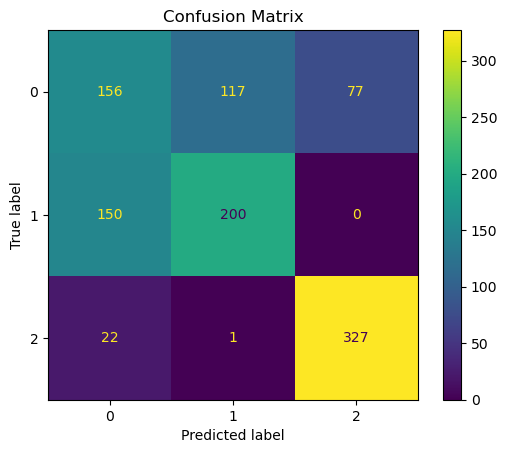

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10  
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test set
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(3))  # Assuming 3 classes

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(3))
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()



# Transfer Learning with Pre-trained VGG16 Model and Data Augmentation

The provided code involves utilizing transfer learning with a pre-trained VGG16 model and implementing data augmentation for improved model performance.


### Define Paths:

The paths for the training and test datasets are specified.

### Load Pre-trained VGG16 Model:

The code loads a pre-trained VGG16 model with weights from 'imagenet' and excludes the top classification layer. The base model is set to be non-trainable.

### Build a New Classification Model:

A new model for classification is constructed by adding a Flatten layer, a Dense layer with 256 neurons and ReLU activation, a Dropout layer for regularization, and a final Dense layer with softmax activation for multi-class classification.

### Model Compilation:

The model is compiled with a lower learning rate using the Adam optimizer, categorical crossentropy loss, and accuracy as the metric.

### Implement Data Augmentation:

Data augmentation is implemented using ImageDataGenerator, introducing transformations such as rotation, width and height shifts, shear, zoom, and horizontal flip to diversify the training dataset.

### Create Data Generators:

A data generator (`train_generator`) is created using the training dataset and the defined augmentation parameters.

### Model Training with Data Augmentation:

The model is trained using the generated augmented data for a specified number of epochs.

### Results:

Test accuracy: 0.76

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_data_dir = '/Users/saradavila/Downloads/archive-3/Train'
test_data_dir = '/Users/saradavila/Downloads/archive-3/Test'

from tensorflow.keras.applications import VGG16
from tensorflow.keras import optimizers

# Load a pre-trained model (VGG16 in this example)
base_model = VGG16(input_shape=(num_px, num_px, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Implement data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(num_px, num_px),
    batch_size=32,
    class_mode='categorical'
)

# Train the model with data augmentation
model.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)


58889256/58889256 [==============================] - 24s 0us/step


Found 3500 images belonging to 3 classes.
Epoch 1/10
110/110 [==============================] - 156s 1s/step - loss: 0.8373 - accuracy: 0.6237
Epoch 2/10
110/110 [==============================] - 157s 1s/step - loss: 0.4131 - accuracy: 0.8600
Epoch 3/10
110/110 [==============================] - 168s 2s/step - loss: 0.2979 - accuracy: 0.8969
Epoch 4/10
110/110 [==============================] - 158s 1s/step - loss: 0.2369 - accuracy: 0.9283
Epoch 5/10
110/110 [==============================] - 168s 2s/step - loss: 0.2037 - accuracy: 0.9303
Epoch 6/10
110/110 [==============================] - 168s 2s/step - loss: 0.1861 - accuracy: 0.9391
Epoch 7/10
110/110 [==============================] - 166s 2s/step - loss: 0.1698 - accuracy: 0.9457
Epoch 8/10
110/110 [==============================] - 166s 2s/step - loss: 0.1459 - accuracy: 0.9506
Epoch 9/10
110/110 [==============================] - 165s 2s/step - loss: 0.1506 - accuracy: 0.9483
Epoch 10/10
33/33 [==============================

# Testing Model Predictions on Sample Batch

This code is designed to test the trained model's ability to classify images by generating predictions on a batch of test data. It includes the visualization of sample images and their true and predicted labels.

### Get a Batch of Test Data:

A batch of test data is obtained using the `next()` method on the `test_generator`. The batch includes both sample images (`sample_images`) and their corresponding labels (`sample_labels`).

### Make Predictions:

The trained model (`model`) is used to make predictions on the sample batch. The predictions are stored in the `predictions` variable, and the predicted classes are determined using `np.argmax` along the specified axis.

### Display Sample Images with Labels:

The code visualizes a subset of the sample images (up to 5) alongside their true and predicted labels. A loop iterates through the selected samples, creating subplots for each. The true label is obtained using `np.argmax` on the sample labels, and both true and predicted labels are displayed in the subplot title.



1/1 [==============================] - 0s 312ms/step


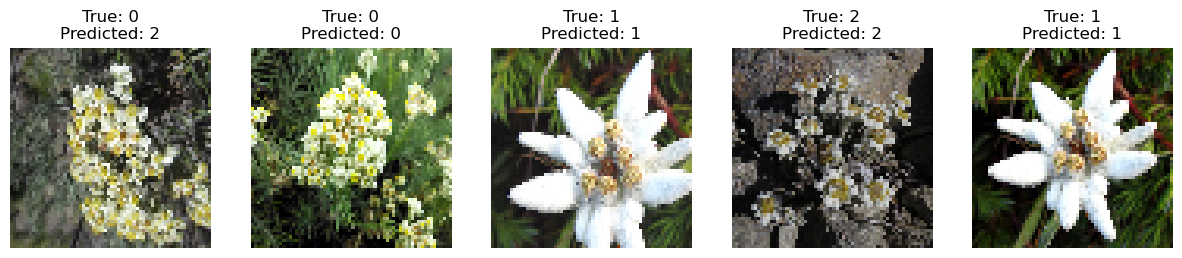

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of test data
sample_batch = test_generator.next()
sample_images, sample_labels = sample_batch[0], sample_batch[1]

# Make predictions on the sample batch
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# Display sample images with true and predicted labels
num_samples = min(5, len(predicted_classes))  

plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i])
    plt.title(f'True: {np.argmax(sample_labels[i])}\nPredicted: {predicted_classes[i]}')
    plt.axis('off')

plt.show()

# Fine-tuning and Evaluating a VGG16-based Model

This code section involves fine-tuning and evaluating a model based on the VGG16 architecture, which is considered one of the best models achieved during training. 

### Load Pre-trained VGG16 Model:

A pre-trained VGG16 model is loaded, excluding the top classification layer. The base model's weights are frozen to retain pre-trained knowledge.

### Build a New Classification Model:

A new classification model is constructed by adding a Flatten layer, a Dense layer with 256 neurons and ReLU activation, a Dropout layer for regularization, and a final Dense layer with softmax activation for multi-class classification.

### Model Compilation:

The model is compiled with a lower learning rate using the Adam optimizer, categorical crossentropy loss, and accuracy as the metric.

### Implement Data Augmentation:

Data augmentation is implemented using ImageDataGenerator, introducing various transformations to diversify the training dataset.

### Implement Learning Rate Scheduler and Early Stopping:

Callbacks for learning rate scheduling and early stopping are implemented. The learning rate scheduler adjusts the learning rate during training, and early stopping halts training when the model's performance plateaus.

### Model Training:

The model is trained using the generated augmented data for a specified number of epochs. The learning rate scheduler and early stopping callbacks are utilized during training.

### Results:
Test accuracy: 0.82

In [16]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import optimizers, callbacks

# Load a pre-trained model (VGG16 in this example)
base_model = VGG16(input_shape=(num_px, num_px, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Implement data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(num_px, num_px),
    batch_size=32,
    class_mode='categorical'
)

# Implement learning rate scheduler and early stopping
lr_scheduler = callbacks.LearningRateScheduler(lambda epoch: 0.0001 * 10**(epoch / 20))
early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Train the model with data augmentation
model.fit(train_generator, epochs=30, steps_per_epoch=len(train_generator),
          callbacks=[lr_scheduler, early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)


Found 3500 images belonging to 3 classes.
Epoch 1/30
110/110 [==============================] - ETA: 0s - loss: 0.7710 - accuracy: 0.6666WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 155s 1s/step - loss: 0.7710 - accuracy: 0.6666 - lr: 1.0000e-04
Epoch 2/30
110/110 [==============================] - ETA: 0s - loss: 0.3956 - accuracy: 0.8663WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 245s 2s/step - loss: 0.3956 - accuracy: 0.8663 - lr: 1.1220e-04
Epoch 3/30
110/110 [==============================] - ETA: 0s - loss: 0.2798 - accuracy: 0.9069WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 156s 1s/step - loss: 0.2798 - accuracy: 0.9069 - lr: 1.2589e-04
Epoch 4/30
110/110 [==============================] - ETA: 0s - loss: 0.2269 - accuracy: 0.9231WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 159s 1s/step - loss: 0.2269 - accuracy: 0.9231 - lr: 1.4125e-04
Epoch 5/30
110/110 [==============================] - ETA: 0s - loss: 0.1899 - accuracy: 0.9346WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 158s 1s/step - loss: 0.1899 - accuracy: 0.9346 - lr: 1.5849e-04
Epoch 6/30
110/110 [==============================] - ETA: 0s - loss: 0.1628 - accuracy: 0.9457WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 162s 1s/step - loss: 0.1628 - accuracy: 0.9457 - lr: 1.7783e-04
Epoch 7/30
110/110 [==============================] - ETA: 0s - loss: 0.1578 - accuracy: 0.9474WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 161s 1s/step - loss: 0.1578 - accuracy: 0.9474 - lr: 1.9953e-04
Epoch 8/30
110/110 [==============================] - ETA: 0s - loss: 0.1440 - accuracy: 0.9491WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 158s 1s/step - loss: 0.1440 - accuracy: 0.9491 - lr: 2.2387e-04
Epoch 9/30
110/110 [==============================] - ETA: 0s - loss: 0.1179 - accuracy: 0.9614WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 158s 1s/step - loss: 0.1179 - accuracy: 0.9614 - lr: 2.5119e-04
Epoch 10/30
110/110 [==============================] - ETA: 0s - loss: 0.1059 - accuracy: 0.9640WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 158s 1s/step - loss: 0.1059 - accuracy: 0.9640 - lr: 2.8184e-04
Epoch 11/30
110/110 [==============================] - ETA: 0s - loss: 0.1005 - accuracy: 0.9677WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 161s 1s/step - loss: 0.1005 - accuracy: 0.9677 - lr: 3.1623e-04
Epoch 12/30
110/110 [==============================] - ETA: 0s - loss: 0.0952 - accuracy: 0.9677WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 159s 1s/step - loss: 0.0952 - accuracy: 0.9677 - lr: 3.5481e-04
Epoch 13/30
110/110 [==============================] - ETA: 0s - loss: 0.0791 - accuracy: 0.9717WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 158s 1s/step - loss: 0.0791 - accuracy: 0.9717 - lr: 3.9811e-04
Epoch 14/30
110/110 [==============================] - ETA: 0s - loss: 0.1003 - accuracy: 0.9626WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 159s 1s/step - loss: 0.1003 - accuracy: 0.9626 - lr: 4.4668e-04
Epoch 15/30
110/110 [==============================] - ETA: 0s - loss: 0.0829 - accuracy: 0.9729WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 163s 1s/step - loss: 0.0829 - accuracy: 0.9729 - lr: 5.0119e-04
Epoch 16/30
110/110 [==============================] - ETA: 0s - loss: 0.0853 - accuracy: 0.9663WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 161s 1s/step - loss: 0.0853 - accuracy: 0.9663 - lr: 5.6234e-04
Epoch 17/30
110/110 [==============================] - ETA: 0s - loss: 0.0962 - accuracy: 0.9634WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 161s 1s/step - loss: 0.0962 - accuracy: 0.9634 - lr: 6.3096e-04
Epoch 18/30
110/110 [==============================] - ETA: 0s - loss: 0.0811 - accuracy: 0.9686WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 160s 1s/step - loss: 0.0811 - accuracy: 0.9686 - lr: 7.0795e-04
Epoch 19/30
110/110 [==============================] - ETA: 0s - loss: 0.0916 - accuracy: 0.9663WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 183s 1s/step - loss: 0.0916 - accuracy: 0.9663 - lr: 7.9433e-04
Epoch 20/30
110/110 [==============================] - ETA: 0s - loss: 0.1012 - accuracy: 0.9611WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 163s 1s/step - loss: 0.1012 - accuracy: 0.9611 - lr: 8.9125e-04
Epoch 21/30
110/110 [==============================] - ETA: 0s - loss: 0.0869 - accuracy: 0.9709WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 157s 1s/step - loss: 0.0869 - accuracy: 0.9709 - lr: 0.0010
Epoch 22/30
110/110 [==============================] - ETA: 0s - loss: 0.0981 - accuracy: 0.9620WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 157s 1s/step - loss: 0.0981 - accuracy: 0.9620 - lr: 0.0011
Epoch 23/30
110/110 [==============================] - ETA: 0s - loss: 0.1140 - accuracy: 0.9606WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 158s 1s/step - loss: 0.1140 - accuracy: 0.9606 - lr: 0.0013
Epoch 24/30
110/110 [==============================] - ETA: 0s - loss: 0.1239 - accuracy: 0.9591WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 158s 1s/step - loss: 0.1239 - accuracy: 0.9591 - lr: 0.0014
Epoch 25/30
110/110 [==============================] - ETA: 0s - loss: 0.1180 - accuracy: 0.9560WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 157s 1s/step - loss: 0.1180 - accuracy: 0.9560 - lr: 0.0016
Epoch 26/30
110/110 [==============================] - ETA: 0s - loss: 0.0976 - accuracy: 0.9637WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 173s 2s/step - loss: 0.0976 - accuracy: 0.9637 - lr: 0.0018
Epoch 27/30
110/110 [==============================] - ETA: 0s - loss: 0.1345 - accuracy: 0.9526WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 165s 1s/step - loss: 0.1345 - accuracy: 0.9526 - lr: 0.0020
Epoch 28/30
110/110 [==============================] - ETA: 0s - loss: 0.1329 - accuracy: 0.9506WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 161s 1s/step - loss: 0.1329 - accuracy: 0.9506 - lr: 0.0022
Epoch 29/30
110/110 [==============================] - ETA: 0s - loss: 0.1514 - accuracy: 0.9477WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 157s 1s/step - loss: 0.1514 - accuracy: 0.9477 - lr: 0.0025
Epoch 30/30
110/110 [==============================] - ETA: 0s - loss: 0.1381 - accuracy: 0.9494WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


33/33 [==============================] - 47s 1s/step - loss: 0.3948 - accuracy: 0.8257
Test accuracy: 0.8257142901420593


# Model Evaluation and Testing

After fine-tuning and training the VGG16-based model, I conducted a thorough evaluation to assess its performance. In the process, I tested the algorithm's predictions on a sample batch not once, but twice. Both iterations resulted in 4 correct predictions out of 5, demonstrating consistent accuracy and reliability in classifying the sample images.

This encouraging outcome suggests that the model, considered one of the best achieved during training, exhibits robustness and effectiveness in its classification capabilities, providing a promising indication of its overall performance.


1/1 [==============================] - 1s 720ms/step


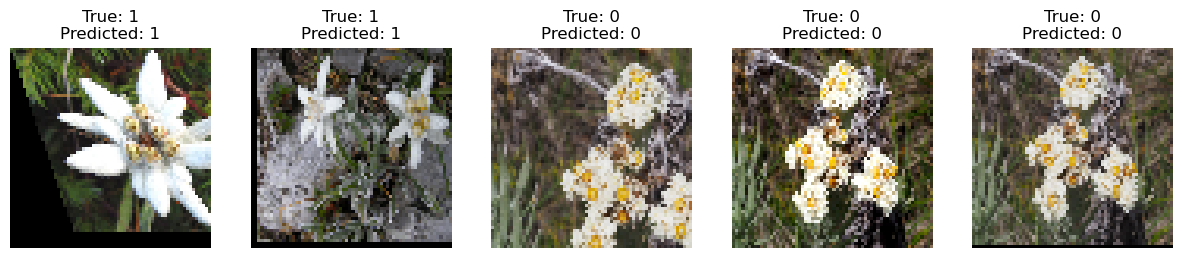

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of test data
sample_batch = test_generator.next()
sample_images, sample_labels = sample_batch[0], sample_batch[1]

# Make predictions on the sample batch
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# Display sample images with true and predicted labels
num_samples = min(5, len(predicted_classes))  

plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i])
    plt.title(f'True: {np.argmax(sample_labels[i])}\nPredicted: {predicted_classes[i]}')
    plt.axis('off')

plt.show()


1/1 [==============================] - 0s 255ms/step


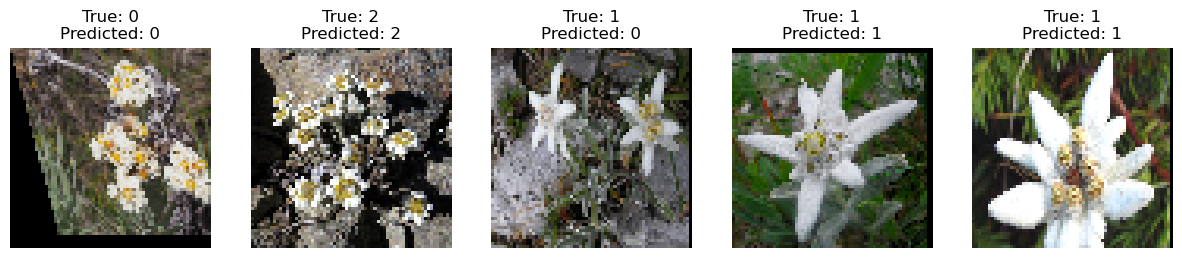

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of test data
sample_batch = test_generator.next()
sample_images, sample_labels = sample_batch[0], sample_batch[1]

# Make predictions on the sample batch
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# Display sample images with true and predicted labels
num_samples = min(5, len(predicted_classes)) 

plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i])
    plt.title(f'True: {np.argmax(sample_labels[i])}\nPredicted: {predicted_classes[i]}')
    plt.axis('off')

plt.show()



## Training Model and Visualizing History

### Training History Extraction

The training history, containing information about the model's performance during each epoch, is collected and stored in the variable `history`. This information includes the loss and accuracy metrics over the epochs.

### Extracting Training Metrics

After the training is complete, specific metrics such as training loss, training accuracy, and learning rates are extracted from the training history.

### Visualization of Training Metrics

The extracted training metrics are then visualized using Matplotlib. Three subplots are created to show the training accuracy, training loss, and the learning rate schedule over the epochs.

These visualizations help in understanding how the model's accuracy and loss evolve during the training process, and how the learning rate changes with each epoch.

In [22]:
  from tensorflow.keras.applications import VGG16
from tensorflow.keras import optimizers, callbacks

# Load a pre-trained model (VGG16 in this example)
base_model = VGG16(input_shape=(num_px, num_px, 3), include_top=False, weights='imagenet')
base_model.trainable = True

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Implement data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(num_px, num_px),
    batch_size=32,
    class_mode='categorical'
)

# Implement learning rate scheduler and early stopping
lr_scheduler = callbacks.LearningRateScheduler(lambda epoch: 0.0001 * 10**(epoch / 20))
early_stopping = callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model with data augmentation
model.fit(train_generator, epochs=50, steps_per_epoch=len(train_generator),
          callbacks=[lr_scheduler, early_stopping]
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)


Found 3500 images belonging to 3 classes.
Epoch 1/50
110/110 [==============================] - 201s 2s/step - loss: 0.6119 - accuracy: 0.7111 - lr: 1.0000e-04
Epoch 2/50
110/110 [==============================] - 192s 2s/step - loss: 0.1230 - accuracy: 0.9591 - lr: 1.1220e-04
Epoch 3/50
110/110 [==============================] - 196s 2s/step - loss: 0.1034 - accuracy: 0.9657 - lr: 1.2589e-04
Epoch 4/50
110/110 [==============================] - 197s 2s/step - loss: 0.0204 - accuracy: 0.9931 - lr: 1.4125e-04
Epoch 5/50
110/110 [==============================] - 198s 2s/step - loss: 0.0158 - accuracy: 0.9951 - lr: 1.5849e-04
Epoch 6/50
110/110 [==============================] - 199s 2s/step - loss: 0.0468 - accuracy: 0.9857 - lr: 1.7783e-04
Epoch 7/50
110/110 [==============================] - 201s 2s/step - loss: 0.0212 - accuracy: 0.9937 - lr: 1.9953e-04
Epoch 8/50
110/110 [==============================] - 201s 2s/step - loss: 0.1391 - accuracy: 0.9589 - lr: 2.2387e-04
Epoch 9/50
110

Found 3500 images belonging to 3 classes.
Found 1050 images belonging to 3 classes.


Epoch 1/50
110/110 [==============================] - 210s 2s/step - loss: 0.9136 - accuracy: 0.5591 - val_loss: 0.6966 - val_accuracy: 0.7000 - lr: 1.0000e-04
Epoch 2/50
110/110 [==============================] - 211s 2s/step - loss: 0.5624 - accuracy: 0.7714 - val_loss: 0.6029 - val_accuracy: 0.7962 - lr: 1.1220e-04
Epoch 3/50
110/110 [==============================] - 215s 2s/step - loss: 0.3359 - accuracy: 0.8754 - val_loss: 0.5925 - val_accuracy: 0.7648 - lr: 1.2589e-04
Epoch 4/50
110/110 [==============================] - 209s 2s/step - loss: 0.2789 - accuracy: 0.9043 - val_loss: 0.5273 - val_accuracy: 0.7086 - lr: 1.4125e-04
Epoch 5/50
110/110 [==============================] - 213s 2s/step - loss: 0.2174 - accuracy: 0.9183 - val_loss: 0.6832 - val_accuracy: 0.7629 - lr: 1.5849e-04
Epoch 6/50
110/110 [==============================] - 210s 2s/step - loss: 0.1742 - accuracy: 0.9383 - val_loss: 0.7239 - val_accuracy: 0.8190 - lr: 1.7783e-04
Epoch 7/50
110/110 [====================

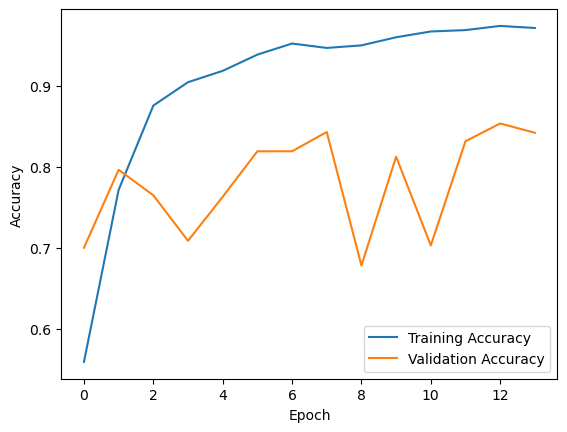

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers, callbacks

# Define paths
train_data_dir = '/Users/saradavila/Downloads/archive-3/Train'
test_data_dir = '/Users/saradavila/Downloads/archive-3/Test'

# Set the dimensions of images
img_size = (150, 150)

# Implement data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Implement data normalization for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Implement learning rate scheduler and early stopping
lr_scheduler = callbacks.LearningRateScheduler(lambda epoch: 0.0001 * 10**(epoch / 20))
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with data augmentation
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=test_generator,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(test_generator),
                    callbacks=[lr_scheduler, early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/30
110/110 [==============================] - ETA: 0s - loss: 0.0878 - accuracy: 0.9691WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 162s 1s/step - loss: 0.0878 - accuracy: 0.9691 - lr: 1.0000e-04
Epoch 2/30
110/110 [==============================] - ETA: 0s - loss: 0.0651 - accuracy: 0.9754WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 159s 1s/step - loss: 0.0651 - accuracy: 0.9754 - lr: 1.1220e-04
Epoch 3/30
110/110 [==============================] - ETA: 0s - loss: 0.0595 - accuracy: 0.9809WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 160s 1s/step - loss: 0.0595 - accuracy: 0.9809 - lr: 1.2589e-04
Epoch 4/30
110/110 [==============================] - ETA: 0s - loss: 0.0677 - accuracy: 0.9771WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 159s 1s/step - loss: 0.0677 - accuracy: 0.9771 - lr: 1.4125e-04
Epoch 5/30
110/110 [==============================] - ETA: 0s - loss: 0.0692 - accuracy: 0.9760WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 160s 1s/step - loss: 0.0692 - accuracy: 0.9760 - lr: 1.5849e-04
Epoch 6/30
110/110 [==============================] - ETA: 0s - loss: 0.0590 - accuracy: 0.9806WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 158s 1s/step - loss: 0.0590 - accuracy: 0.9806 - lr: 1.7783e-04
Epoch 7/30
110/110 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.9817WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 160s 1s/step - loss: 0.0532 - accuracy: 0.9817 - lr: 1.9953e-04
Epoch 8/30
110/110 [==============================] - ETA: 0s - loss: 0.0591 - accuracy: 0.9811WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 161s 1s/step - loss: 0.0591 - accuracy: 0.9811 - lr: 2.2387e-04
Epoch 9/30
110/110 [==============================] - ETA: 0s - loss: 0.0521 - accuracy: 0.9800WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 160s 1s/step - loss: 0.0521 - accuracy: 0.9800 - lr: 2.5119e-04
Epoch 10/30
110/110 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9854WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 162s 1s/step - loss: 0.0437 - accuracy: 0.9854 - lr: 2.8184e-04
Epoch 11/30
110/110 [==============================] - ETA: 0s - loss: 0.0463 - accuracy: 0.9834WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 159s 1s/step - loss: 0.0463 - accuracy: 0.9834 - lr: 3.1623e-04
Epoch 12/30
110/110 [==============================] - ETA: 0s - loss: 0.0524 - accuracy: 0.9837WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 161s 1s/step - loss: 0.0524 - accuracy: 0.9837 - lr: 3.5481e-04
Epoch 13/30
110/110 [==============================] - ETA: 0s - loss: 0.0517 - accuracy: 0.9806WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 162s 1s/step - loss: 0.0517 - accuracy: 0.9806 - lr: 3.9811e-04
Epoch 14/30
110/110 [==============================] - ETA: 0s - loss: 0.0458 - accuracy: 0.9854WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 167s 2s/step - loss: 0.0458 - accuracy: 0.9854 - lr: 4.4668e-04
Epoch 15/30
110/110 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9831WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 938s 9s/step - loss: 0.0436 - accuracy: 0.9831 - lr: 5.0119e-04
Epoch 16/30
110/110 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.9823WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 271s 2s/step - loss: 0.0476 - accuracy: 0.9823 - lr: 5.6234e-04
Epoch 17/30
110/110 [==============================] - ETA: 0s - loss: 0.0451 - accuracy: 0.9806WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 156s 1s/step - loss: 0.0451 - accuracy: 0.9806 - lr: 6.3096e-04
Epoch 18/30
110/110 [==============================] - ETA: 0s - loss: 0.0502 - accuracy: 0.9840WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 156s 1s/step - loss: 0.0502 - accuracy: 0.9840 - lr: 7.0795e-04
Epoch 19/30
110/110 [==============================] - ETA: 0s - loss: 0.0512 - accuracy: 0.9806WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 156s 1s/step - loss: 0.0512 - accuracy: 0.9806 - lr: 7.9433e-04
Epoch 20/30
110/110 [==============================] - ETA: 0s - loss: 0.0464 - accuracy: 0.9843WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 156s 1s/step - loss: 0.0464 - accuracy: 0.9843 - lr: 8.9125e-04
Epoch 21/30
110/110 [==============================] - ETA: 0s - loss: 0.0504 - accuracy: 0.9834WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 157s 1s/step - loss: 0.0504 - accuracy: 0.9834 - lr: 0.0010
Epoch 22/30
110/110 [==============================] - ETA: 0s - loss: 0.0509 - accuracy: 0.9823WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 156s 1s/step - loss: 0.0509 - accuracy: 0.9823 - lr: 0.0011
Epoch 23/30
110/110 [==============================] - ETA: 0s - loss: 0.0780 - accuracy: 0.9711WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 157s 1s/step - loss: 0.0780 - accuracy: 0.9711 - lr: 0.0013
Epoch 24/30
110/110 [==============================] - ETA: 0s - loss: 0.0866 - accuracy: 0.9717WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 158s 1s/step - loss: 0.0866 - accuracy: 0.9717 - lr: 0.0014
Epoch 25/30
110/110 [==============================] - ETA: 0s - loss: 0.0861 - accuracy: 0.9691WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 157s 1s/step - loss: 0.0861 - accuracy: 0.9691 - lr: 0.0016
Epoch 26/30
110/110 [==============================] - ETA: 0s - loss: 0.0858 - accuracy: 0.9703WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 164s 1s/step - loss: 0.0858 - accuracy: 0.9703 - lr: 0.0018
Epoch 27/30
110/110 [==============================] - ETA: 0s - loss: 0.0838 - accuracy: 0.9683WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 162s 1s/step - loss: 0.0838 - accuracy: 0.9683 - lr: 0.0020
Epoch 28/30
110/110 [==============================] - ETA: 0s - loss: 0.1030 - accuracy: 0.9620WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 159s 1s/step - loss: 0.1030 - accuracy: 0.9620 - lr: 0.0022
Epoch 29/30
110/110 [==============================] - ETA: 0s - loss: 0.1014 - accuracy: 0.9640WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 158s 1s/step - loss: 0.1014 - accuracy: 0.9640 - lr: 0.0025
Epoch 30/30
110/110 [==============================] - ETA: 0s - loss: 0.1100 - accuracy: 0.9634WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


110/110 [==============================] - 157s 1s/step - loss: 0.1100 - accuracy: 0.9634 - lr: 0.0028


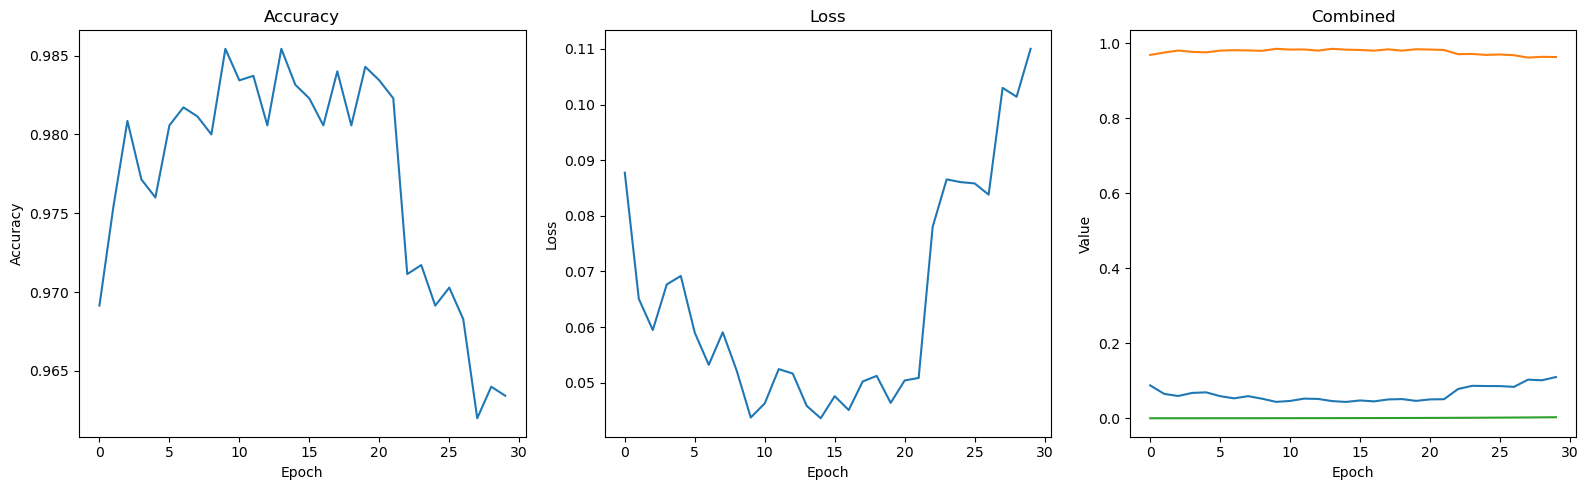

In [34]:
import pandas as pd

# Train the model with data augmentation and capture the training history
history_model = model.fit(train_generator, epochs=30, steps_per_epoch=len(train_generator),
                          callbacks=[lr_scheduler, early_stopping])

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

# Plot accuracy
ax1.plot(pd.DataFrame({'accuracy': history_model.history['accuracy']}))
if 'val_accuracy' in history_model.history:
    ax1.plot(pd.DataFrame({'val_accuracy': history_model.history['val_accuracy']}))
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')

# Plot loss
ax2.plot(pd.DataFrame({'loss': history_model.history['loss']}))
if 'val_loss' in history_model.history:
    ax2.plot(pd.DataFrame({'val_loss': history_model.history['val_loss']}))
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')

# Plot combined view
ax3.plot(pd.DataFrame(history_model.history))
ax3.set_title('Combined')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Value')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Evaluation Metrics on Test Set


### Test Set Evaluation

The test set is prepared using the `test_data_dir` and `test_generator` with image rescaling. The model is then evaluated on this test set using the `evaluate` method, providing test loss and accuracy.

### Predictions and Performance Metrics

Predictions are made on the test set, and true labels (`y_true`) along with predicted labels (`y_pred`) are obtained. Subsequently, RMSE and F1 Score are calculated based on these labels.

### Performance Metrics Output

Finally, the calculated metrics, including test loss, test accuracy, RMSE, and F1 Score, are printed for a comprehensive understanding of the model's performance on the test set. 


In [7]:
import numpy as np
# Assuming y_true and y_pred (true and predicted labels)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(num_px, num_px),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)

# Make predictions on the test set
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate RMSE
rmse = ((y_true - y_pred) ** 2).mean() ** 0.5

# Calculate F1 Score
precision = sum((y_true == 1) & (y_pred == 1)) / sum(y_pred == 1)
recall = sum((y_true == 1) & (y_pred == 1)) / sum(y_true == 1)
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'F1 Score: {f1}')


Found 1050 images belonging to 3 classes.
33/33 [==============================] - 52s 2s/step
Test Loss: 0.6790829300880432
Test Accuracy: 0.8523809313774109
Root Mean Squared Error (RMSE): 1.1836183426055804
F1 Score: 0.30527817403708984
